# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_Vidio_1.csv")
df.head()

,userName,score,at,content
0,Hp Jos,3,2024-04-30 23:39:25,NASDGM
1,Gistananjar mau gk,3,2024-04-30 23:24:57,RCTI MNCtv global mana.
2,khaironi hasdian,2,2024-04-30 22:37:01,Mau downoad video kok harus langganan dulu gak...
3,RobiiMd,3,2024-04-30 21:06:46,Entah kenapa kalo nonton di tv suka tiba2 berh...
4,Javier Ananta,1,2024-04-30 20:57:04,"Aplikasi maling ,tau² motong saldo .mending il..."


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,NASDGM,Hp Jos,2024-04-30 23:39:25
1,RCTI MNCtv global mana.,Gistananjar mau gk,2024-04-30 23:24:57
2,Mau downoad video kok harus langganan dulu gak...,khaironi hasdian,2024-04-30 22:37:01
3,Entah kenapa kalo nonton di tv suka tiba2 berh...,RobiiMd,2024-04-30 21:06:46
4,"Aplikasi maling ,tau² motong saldo .mending il...",Javier Ananta,2024-04-30 20:57:04
...,...,...,...
990,Bismillah aplikasi nya bagus,Milah Jamilah,2024-04-10 13:56:43
991,Terbaik,Lukman Harmoko,2024-04-10 13:52:21
992,Sy sdh beli paket video tp gambar masih putus ...,Sar Iman,2024-04-10 13:29:52
993,"no komen, soalnya say tidak bisa bikin apk sen...",Joni wirawan,2024-04-10 12:43:35


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   995 non-null    object
 1   userName  995 non-null    object
 2   at        995 non-null    object
dtypes: object(3)
memory usage: 23.4+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,995,995,995
unique,930,990,995
top,Mantap,Khaerul Umam,2024-04-30 23:39:25
freq,14,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(995, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(930, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,nasdgm,Hp Jos,2024-04-30 23:39:25
1,rcti mnctv global mana,Gistananjar mau gk,2024-04-30 23:24:57
2,mau downoad video kok harus langganan dulu gak...,khaironi hasdian,2024-04-30 22:37:01
3,entah kenapa kalo nonton di tv suka tiba2 berh...,RobiiMd,2024-04-30 21:06:46
4,aplikasi maling tau motong saldo mending ilang...,Javier Ananta,2024-04-30 20:57:04
...,...,...,...
989,cape2 download besoknya malah hilang semua pdh...,Trica electrica,2024-04-10 14:02:16
990,bismillah aplikasi nya bagus,Milah Jamilah,2024-04-10 13:56:43
992,sy sdh beli paket video tp gambar masih putus ...,Sar Iman,2024-04-10 13:29:52
993,no komen soalnya say tidak bisa bikin apk sendiri,Joni wirawan,2024-04-10 12:43:35


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,,Hp Jos,2024-04-30 23:39:25
1,rcti mnctv global mana,Gistananjar mau gk,2024-04-30 23:24:57
2,mau downoad video kenapa harus langganan dulu ...,khaironi hasdian,2024-04-30 22:37:01
3,etidak tahu kenapa kalo nonton di tv suka tiba...,RobiiMd,2024-04-30 21:06:46
4,aplikasi maling tau motong saldo mending ilang...,Javier Ananta,2024-04-30 20:57:04
...,...,...,...
989,cape2 download besoknya malah hilang semua pdh...,Trica electrica,2024-04-10 14:02:16
990,bismillah aplikasi nya bagus,Milah Jamilah,2024-04-10 13:56:43
992,sy sdh beli paket video tp gambar masih putus ...,Sar Iman,2024-04-10 13:29:52
993,no komen soalnya say tidak bisa bikin aplikasi...,Joni wirawan,2024-04-10 12:43:35


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.2 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,,Hp Jos,2024-04-30 23:39:25
1,rcti mnctv global mana,Gistananjar mau gk,2024-04-30 23:24:57
2,mau downoad video harus langganan dulu kayak d...,khaironi hasdian,2024-04-30 22:37:01
3,etidak tahu kalo nonton tv suka tiba2 berheti ...,RobiiMd,2024-04-30 21:06:46
4,aplikasi maling tau motong saldo mending ilang...,Javier Ananta,2024-04-30 20:57:04
...,...,...,...
989,cape2 download besoknya malah hilang semua pdh...,Trica electrica,2024-04-10 14:02:16
990,bismillah aplikasi nya bagus,Milah Jamilah,2024-04-10 13:56:43
992,sy sdh beli paket video tp gambar putus putus,Sar Iman,2024-04-10 13:29:52
993,no komen soalnya say bisa bikin aplikasi sendiri,Joni wirawan,2024-04-10 12:43:35


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                     []
1                            [rcti, mnctv, global, mana]
2      [mau, downoad, video, harus, langganan, dulu, ...
3      [etidak, tahu, kalo, nonton, tv, suka, tiba2, ...
4      [aplikasi, maling, tau, motong, saldo, mending...
                             ...                        
989    [cape2, download, besoknya, malah, hilang, sem...
990                    [bismillah, aplikasi, nya, bagus]
992    [sy, sdh, beli, paket, video, tp, gambar, putu...
993    [no, komen, soalnya, say, bisa, bikin, aplikas...
994                  [nonton, psg, menang, lawan, barsa]
Name: content, Length: 930, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Vidio_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Vidio_1.csv', encoding = 'latin1')
df_clean

,content
0,NaN
1,rcti mnctv global mana
2,mau downoad video langgan dulu kayak dulu jele...
3,etidak tahu kalo nonton tv suka tiba2 berheti ...
4,aplikasi maling tau motong saldo mending ilang...
...,...
925,cape2 download besok malah hilang semua pdhl m...
926,bismillah aplikasi nya bagus
927,sy sdh beli paket video tp gambar putus putus
928,no komen soal say bikin aplikasi sendiri


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_Vidio_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'bfill')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Vidio_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Vidio_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,rcti mnctv global mana,rcti mnctv globally which
1,1,rcti mnctv global mana,rcti mnctv globally which
2,2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...
3,3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...
4,4,aplikasi maling tau motong saldo mending ilang...,A thief's app knows how to cut balance from th...
...,...,...,...
925,925,cape2 download besok malah hilang semua pdhl m...,"fontcolor="" # FFFF00""cape2 downloadtomorrow fo..."
926,926,bismillah aplikasi nya bagus,Bismillah application is good.
927,927,sy sdh beli paket video tp gambar putus putus,"I bought a video package, but the picture broke."
928,928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_Vidio_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,rcti mnctv global mana,rcti mnctv globally which
1,1,rcti mnctv global mana,rcti mnctv globally which
2,2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...
3,3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...
4,4,aplikasi maling tau motong saldo mending ilang...,A thief's app knows how to cut balance from th...
...,...,...,...
925,925,cape2 download besok malah hilang semua pdhl m...,"fontcolor="" # FFFF00""cape2 downloadtomorrow fo..."
926,926,bismillah aplikasi nya bagus,Bismillah application is good.
927,927,sy sdh beli paket video tp gambar putus putus,"I bought a video package, but the picture broke."
928,928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 353
Netral = 379
Negatif = 198

Total Data Seluruhnya : 930


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,rcti mnctv global mana,rcti mnctv globally which,Netral
1,1,rcti mnctv global mana,rcti mnctv globally which,Netral
2,2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...,Negatif
3,3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...,Positif
4,4,aplikasi maling tau motong saldo mending ilang...,A thief's app knows how to cut balance from th...,Netral
...,...,...,...,...
925,925,cape2 download besok malah hilang semua pdhl m...,"fontcolor="" # FFFF00""cape2 downloadtomorrow fo...",Netral
926,926,bismillah aplikasi nya bagus,Bismillah application is good.,Positif
927,927,sy sdh beli paket video tp gambar putus putus,"I bought a video package, but the picture broke.",Netral
928,928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...,Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,rcti mnctv global mana,rcti mnctv globally which,Netral
1,rcti mnctv global mana,rcti mnctv globally which,Netral
2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...,Negatif
3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...,Positif
4,aplikasi maling tau motong saldo mending ilang...,A thief's app knows how to cut balance from th...,Netral
...,...,...,...
925,cape2 download besok malah hilang semua pdhl m...,"fontcolor="" # FFFF00""cape2 downloadtomorrow fo...",Netral
926,bismillah aplikasi nya bagus,Bismillah application is good.,Positif
927,sy sdh beli paket video tp gambar putus putus,"I bought a video package, but the picture broke.",Netral
928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...,Positif


# **Visualisasi**


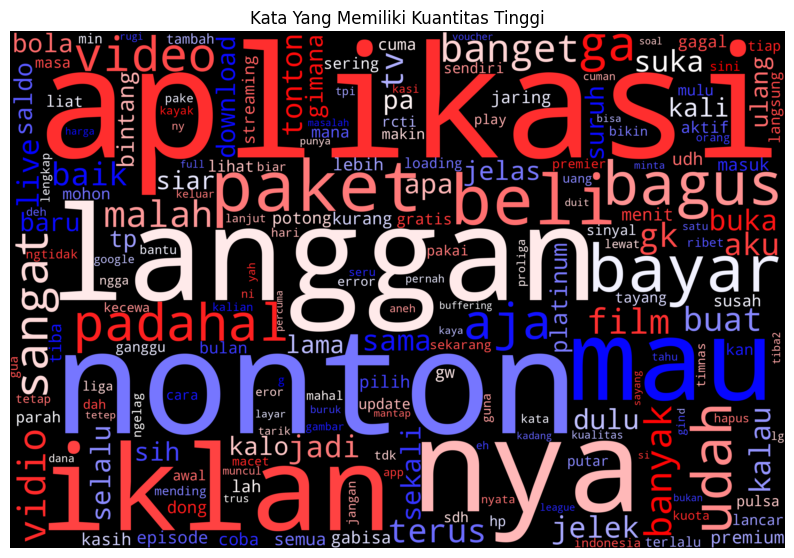

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


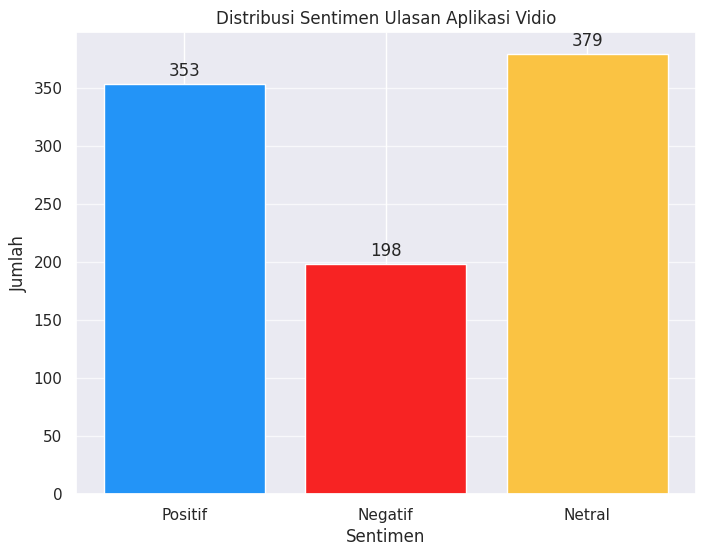

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Vidio")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...,Negatif
3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...,Positif
6,login tv lewat qr gilir masuk ga nonton blang ...,TV logins go in and not watch black phones whe...,Negatif
7,gila ni aplikasi udah bayar iklan nya banyak,This crazy app has paid for a lot of commercials.,Negatif
8,aplikasi komunistayangan sctv bola lancar lanc...,The Communist app is sctv The ball is smooth,Positif
...,...,...,...
922,langgan iklan download tu lamaaa bangett kalau...,Advertising the download is so long. When it's...,Positif
924,ga bagusssss udh beli paket premium ovo nyata ...,It's not good for you to buy a real premium ov...,Negatif
926,bismillah aplikasi nya bagus,Bismillah application is good.,Positif
928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...,Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
2,mau downoad video langgan dulu kayak dulu jele...,Want downoad videoanggan first as bad as it us...,0
3,etidak tahu kalo nonton tv suka tiba2 berheti ...,I didn't know TV watch likes to go straight to...,1
6,login tv lewat qr gilir masuk ga nonton blang ...,TV logins go in and not watch black phones whe...,0
7,gila ni aplikasi udah bayar iklan nya banyak,This crazy app has paid for a lot of commercials.,0
8,aplikasi komunistayangan sctv bola lancar lanc...,The Communist app is sctv The ball is smooth,1
...,...,...,...
922,langgan iklan download tu lamaaa bangett kalau...,Advertising the download is so long. When it's...,1
924,ga bagusssss udh beli paket premium ovo nyata ...,It's not good for you to buy a real premium ov...,0
926,bismillah aplikasi nya bagus,Bismillah application is good.,1
928,no komen soal say bikin aplikasi sendiri,no comment about saying create your own applic...,1


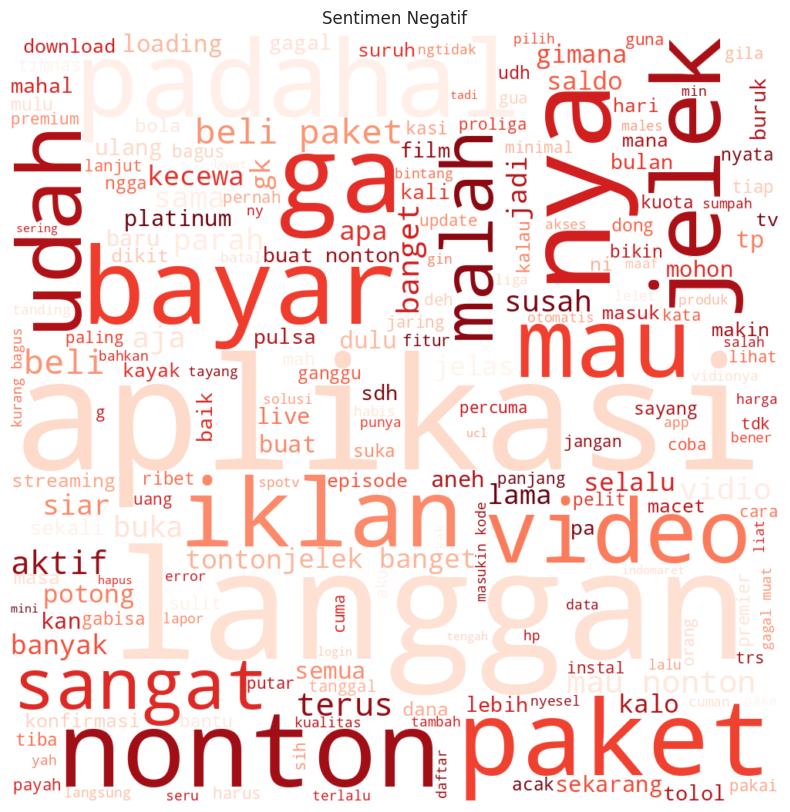

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

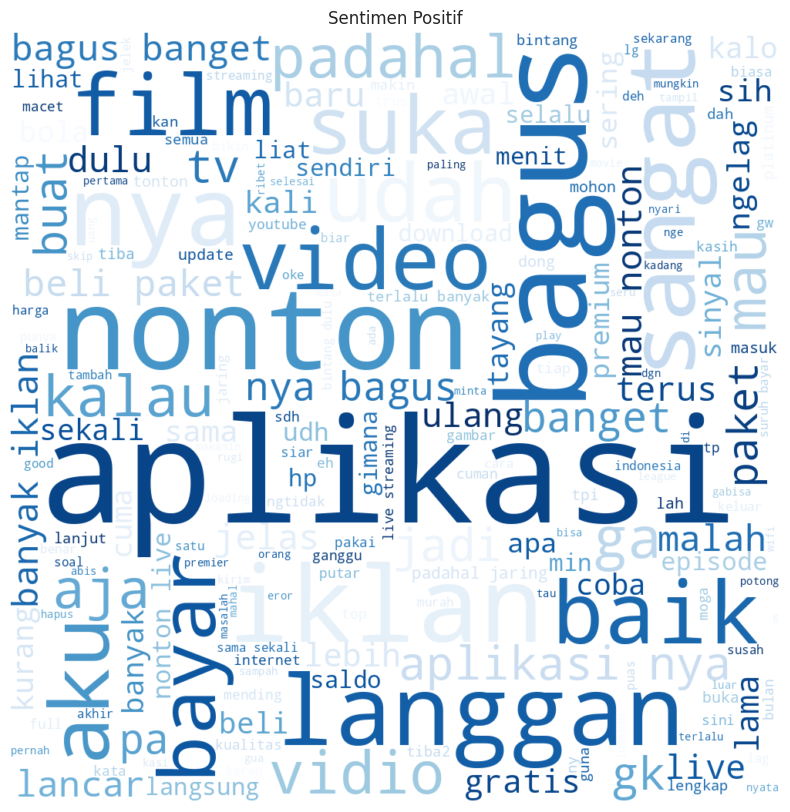

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    353
0    198
Name: count, dtype: int64

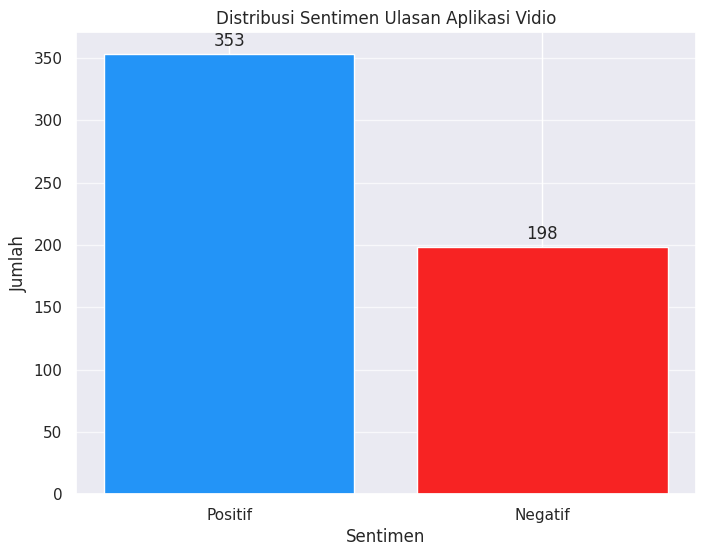

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Vidio")

# **Data Preparation**

In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [69]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [70]:
X_train

641    jelek banget sih udah beli langgan kalo stream...
814                                      aplikasi konyol
352                 iklan banyak sekalisusah buat nonton
24     aplikasi bagus sangat sayang paket tipu langga...
560     minimal free live redspark vs indonesia all star
                             ...                        
112           kuuuaammpprrooeet banyak bayar kata gratis
167                                       gk bagus lelet
463    udah lumayan bagus cuma siar tv nya kurang len...
727    sumpah aplikasi jelas aplikasi penuh tipu udah...
160    dah isi paket pangganan 60 rb terang dah aktif...
Name: content, Length: 440, dtype: object

In [71]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [72]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [73]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6936936936936937
Akurasi untuk c = 0.05: 0.7747747747747747
Akurasi untuk c = 0.25: 0.8018018018018018
Akurasi untuk c = 0.5: 0.8018018018018018
Akurasi untuk c = 0.75: 0.8018018018018018
Akurasi untuk c = 1: 0.7927927927927928


In [75]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [76]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7927927927927928 


# **Modeling**


In [77]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.79
[[24 17]
 [ 6 64]]
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        41
           1       0.79      0.91      0.85        70

    accuracy                           0.79       111
   macro avg       0.80      0.75      0.76       111
weighted avg       0.79      0.79      0.78       111



# **Testing**


In [82]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : jelek dan harus berlangganan
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [78]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi bagus bat nonton bola
Hasil Analisis Sentimen Untuk Teks Baru : Positif
